In exploration of this data there are two definitions of location, one is the actual devices geolocation as a lat/lon, the other is Twitters notion of "place" which seems to encompass the user definition of where they are among other things.

We have searched for the locations:
* London
* Manchester
* Preston

with the geolocation search we have
* London - 1486
* Manchester - 407
* Preston - 42

with the place search we have
* London - 2904
* Manchester - 401
* Preston - 29

In [162]:
import pandas as pd

In [163]:
londonRadius = pd.read_csv('FromGeoSearch/prestonGeoPointRadius.csv')
londonPlace = pd.read_csv('FromGeoSearch/prestonGeoPlace.csv')

In [164]:
df = pd.concat([londonRadius,londonPlace])
df = df.reset_index()

In [165]:
df['text']

0     "Vegan chocolate" in #Preston #UnitedKingdom h...
1     #bowl food #party #21st #21stbirthday #glam #m...
2     #naturli #Veganuary2019 #Vegan #veganism #Vega...
3     Amazing vegan burgers from Aldi. Highly recomm...
4     @ChrisGPackham @CostaCoffee @eat_news @Delice_...
                            ...                        
66    @PeteOtway @GreggsOfficial \nHurry up into wor...
67    @icod Sorry Fab-Cod, wasn't trivialising mog's...
68    Piers Morgan losing his shit over Greggs relea...
69    2019 is going to be my best year EVER @GreggsO...
70    Looking for healthy options for a fresh start ...
Name: text, Length: 71, dtype: object

In [166]:
# check for duplicates
df['text'].duplicated().any()

# remove duplicated rows
df = df[~df['text'].duplicated()]
len(df)

46

In [167]:
# remove tagged types
df = df[df['type'].isnull()]

In [168]:
# reduce to only columns for our resaerch
df = df[['id','created_at', 'text','author.id','author.created_at', 'author.username','author.location','author.public_metrics.followers_count','geo.full_name','public_metrics.like_count','public_metrics.retweet_count']]
df.head()

,id,created_at,text,author.id,author.created_at,author.username,author.location,author.public_metrics.followers_count,geo.full_name,public_metrics.like_count,public_metrics.retweet_count
0,1089577616707895296,2019-01-27T17:35:21.000Z,"""Vegan chocolate"" in #Preston #UnitedKingdom h...",824637752574488576,2017-01-26T15:18:56.000Z,WhatsOnOLIO,NaN,1091,"Preston, England",0,0
1,1089316328438083584,2019-01-27T00:17:05.000Z,#bowl food #party #21st #21stbirthday #glam #m...,1393032373,2013-04-30T20:43:27.000Z,highclassfood,"North West, England",114,"Preston, England",2,0
2,1088877546740039681,2019-01-25T19:13:32.000Z,#naturli #Veganuary2019 #Vegan #veganism #Vega...,928718304646230016,2017-11-09T20:17:53.000Z,quigley_kirsty,"Preston, England",3536,"Preston, England",2,0
3,1088514098529292289,2019-01-24T19:09:19.000Z,Amazing vegan burgers from Aldi. Highly recomm...,135987218,2010-04-22T18:39:07.000Z,stainless2010,"Preston, UK",351,"Preston, England",1,0
5,1085597925961596929,2019-01-16T18:01:29.000Z,@marksandspencer @ChrisGPackham @CostaCoffee @...,293354078,2011-05-05T06:13:53.000Z,piedwarbler1,NW England,935,"Leyland, England",0,0


In [169]:
# sort by date
df['created_at'] =pd.to_datetime(df.created_at)
df.sort_values(by='created_at')
df = df.reset_index()

In [170]:
# sentiment analysis
import nltk
nltk.download([
    "vader_lexicon",
])
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(string):
    return sia.polarity_scores(string)['compound']

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/joe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [171]:
df['sentiment'] = df['text'].apply(get_sentiment)
df.head()

,index,id,created_at,text,author.id,author.created_at,author.username,author.location,author.public_metrics.followers_count,geo.full_name,public_metrics.like_count,public_metrics.retweet_count,sentiment
0,0,1089577616707895296,2019-01-27 17:35:21+00:00,"""Vegan chocolate"" in #Preston #UnitedKingdom h...",824637752574488576,2017-01-26T15:18:56.000Z,WhatsOnOLIO,NaN,1091,"Preston, England",0,0,0.0000
1,1,1089316328438083584,2019-01-27 00:17:05+00:00,#bowl food #party #21st #21stbirthday #glam #m...,1393032373,2013-04-30T20:43:27.000Z,highclassfood,"North West, England",114,"Preston, England",2,0,0.0000
2,2,1088877546740039681,2019-01-25 19:13:32+00:00,#naturli #Veganuary2019 #Vegan #veganism #Vega...,928718304646230016,2017-11-09T20:17:53.000Z,quigley_kirsty,"Preston, England",3536,"Preston, England",2,0,0.0000
3,3,1088514098529292289,2019-01-24 19:09:19+00:00,Amazing vegan burgers from Aldi. Highly recomm...,135987218,2010-04-22T18:39:07.000Z,stainless2010,"Preston, UK",351,"Preston, England",1,0,0.7836
4,5,1085597925961596929,2019-01-16 18:01:29+00:00,@marksandspencer @ChrisGPackham @CostaCoffee @...,293354078,2011-05-05T06:13:53.000Z,piedwarbler1,NW England,935,"Leyland, England",0,0,0.0000


<AxesSubplot:ylabel='Frequency'>

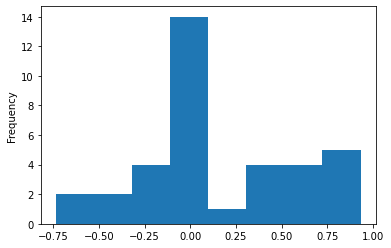

In [172]:
df.sentiment.plot(kind='hist',bins=8)

<AxesSubplot:>

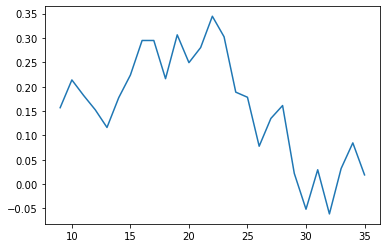

In [175]:
df['sentiment'].rolling(10).mean().plot()

In [174]:
# output data
df.to_csv('PrestonGeoMerged.csv', index=False)